# Part II - (ford go bike system)
## by (Abdullah Altamimi)

## Investigation Overview


The primary goal of this investigation is to analyze the given dataset to extract meaningful insights, identify patterns, and address specific questions or hypotheses


## Dataset Overview and Executive Summary

The dataset captures the operation and usage of the Ford GoBike system, a bike-sharing service

Key features include:

Trip Duration (duration_sec): The duration of each bike ride in seconds (numerical).
Start and End Stations: Locations where trips start and end (categorical).
Member Birth Year: The birth year of the rider (numerical).
Member Gender: The rider’s gender (categorical: male, female, or other).
User Type: Whether the rider is a subscriber or a casual user (categorical).
Bike ID: Unique identifier for each bike used.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
import datetime as dt

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.dropna(inplace=True)

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['bike_id'] =df.bike_id.astype("int")


import datetime as dt
df['start_day'] = df['start_time'].dt.day_name()
df['start_month'] = df['start_time'].dt.month_name()

df['start_hr'] = df['start_time'].dt.hour

df['end_day'] = df['end_time'].dt.day_name()
df['end_month'] = df['end_time'].dt.month_name()
df['end_hr'] = df['end_time'].dt.hour

## Distribution of Rides by Member Gender




In [4]:
def plot_count_with_percentage(data, x, color='tab:blue'): ##function for plotting plotcounts with percentage
    # Check if the DataFrame is empty
    if data.empty:
        print("The DataFrame is empty.")
        return

    # Check if the specified column exists in the DataFrame
    if x not in data.columns:
        print(f"The column '{x}' does not exist in the DataFrame.")
        return

    # Count the occurrences
    counts = data[x].value_counts()
    
    # Check if there are counts to plot
    if counts.empty:
        print(f"No data to plot for '{x}'.")
        return
    
    # Calculate percentages
    percentages = (counts / counts.sum()) * 100
    
    # Create a DataFrame for plotting
    count_df = pd.DataFrame({'Count': counts, 'Percentage': percentages}).reset_index()
    count_df.columns = [x, 'Count', 'Percentage']
    
    # Sort the DataFrame by Count
    count_df = count_df.sort_values(by='Count', ascending=False)
    
    # Create the count plot
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=count_df, x=x, y='Count', color=color)
    
    # Add percentage annotations
    for i, p in enumerate(ax.patches):
        percentage = count_df['Percentage'].iloc[i]
        ax.annotate(f'{p.get_height():.1f} ({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')
    
    plt.title(f'{x} Distribution')
    plt.ylabel('Count')
    plt.xlabel(x)

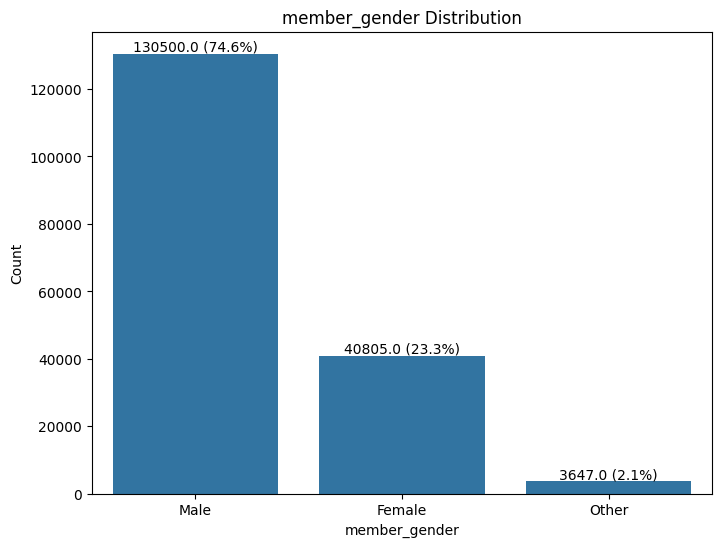

In [6]:
plot_count_with_percentage(df, 'member_gender')

males are representing 74.6% of riders

## Relationship between rider birth year and ride duration



(1940.0, 2003.0)

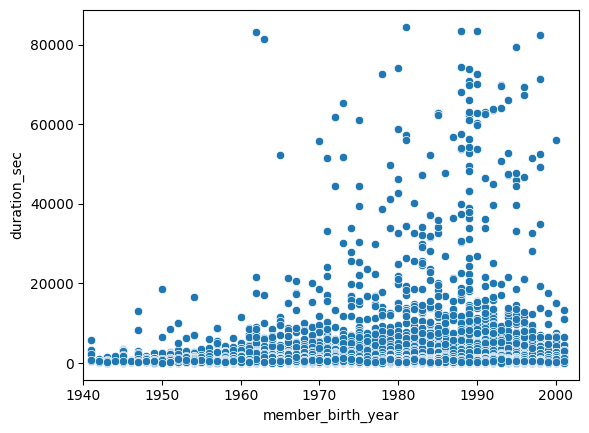

In [7]:
sns.scatterplot(data=df,x="member_birth_year",y="duration_sec")
plt.xlim(1940,2003)
##plotting a scatter plot of the ride duration and the birth year

it look like there is realation between age and ride duration, the younger you are the more ride duration

## The average ride duration based on gender and day of the week



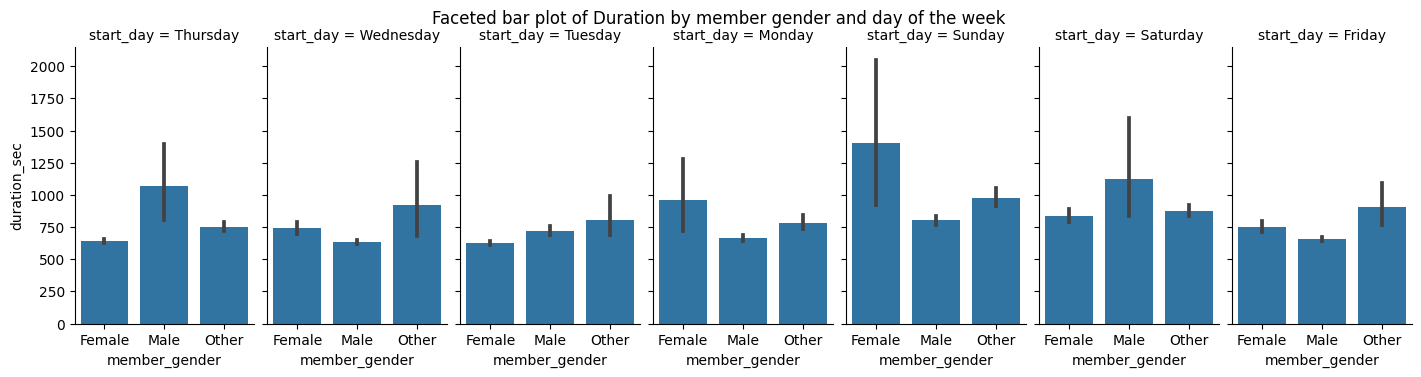

In [10]:
g=sns.FacetGrid(data=df,col='start_day') #plotting a facetgrid to show the average durations ride based on the member gender and each day of the week
#the indvidual subplots (facets)
g.map(sns.barplot,"member_gender","duration_sec")
plt.suptitle("Faceted bar plot of Duration by member gender and day of the week ")
g.fig.set_size_inches(14,4);

we can see that males have the most average ride duration on Thursday and saturday, while females on monday and sunday are the highest, and others on wednesday and tuesday and friday